In [1]:
from music21 import converter
from music21 import stream, note, interval
import pandas as pd
import music_utils as mu
import matplotlib.pyplot as plt
import numpy as np

/Users/ashitagarg/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
import music_utils as mu
folder_path = "./chopin_etudes"

all_intervals = []
all_prev_notes = []

mu.get_notes(all_intervals, all_prev_notes, folder_path)


/Users/ashitagarg/Library/Python/3.9/lib/python/site-packages/music21/musicxml/xmlToM21.py:4081: MusicXMLWarning: Line <bracket> stop without start
  warnings.warn('Line <' + mxObj.tag + '> stop without start', MusicXMLWarning)
/Users/ashitagarg/Library/Python/3.9/lib/python/site-packages/music21/musicxml/xmlToM21.py:5128: MusicXMLWarning: Could not import wedge: Error in getting DynamicWedges
  warnings.warn(f'Could not import {tag}: {excep}', MusicXMLWarning)


In [3]:
count = 0
for n in all_intervals:
    if n.split('-')[0] != n:
        all_intervals[count] = n.split('-')[0] + n.split('-')[1]
    count += 1

count = 0
for n in all_prev_notes:
    if n.split('-')[0] != n:
        all_prev_notes[count] = n.split('-')[0] + n.split('-')[1]
    count += 1


In [4]:
df = pd.DataFrame({'Note': all_prev_notes, 'Interval': all_intervals})

for row in df.itertuples():
    if row.Note.startswith('AA') or row.Note.startswith('dd') or row.Note.endswith('0'):
        df.drop(row.Index, inplace=True)

df_wide = df.pivot_table(index='Note', columns='Interval', aggfunc='size', fill_value=0)
print(df_wide.shape)
df_wide.head(42)

(36, 26)


Interval,A1,A2,A4,A5,A6,M2,M3,M5,M6,M7,...,d3,d4,d5,d6,d7,m2,m3,m5,m6,m7
Note,,,,,,,,,,,,,,,,,,,,,
A1,0,0,4,0,1,3,3,0,3,0,...,0,0,2,0,1,2,3,0,2,0
A2,5,5,7,0,0,14,5,0,2,0,...,0,0,1,0,1,11,11,0,7,0
A3,7,0,2,0,0,11,10,0,5,0,...,0,0,3,1,0,20,4,0,3,0
A4,3,1,7,0,0,14,8,0,4,0,...,28,2,13,2,2,36,19,0,3,0
A5,2,0,1,1,0,5,15,0,4,0,...,0,1,1,1,0,8,6,0,2,1
A6,1,2,0,0,0,3,2,0,0,0,...,1,0,4,0,0,5,2,0,1,0
A7,0,0,0,0,0,1,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A8,1,0,8,0,0,1,3,0,0,0,...,0,0,0,0,1,3,0,0,1,0
M1,0,0,9,1,0,55,7,0,21,2,...,0,0,9,0,0,23,25,0,5,3


"random_numbers = np.random.rand(len(df_graph))\ntotal_sum = random_numbers.sum()\ndf_graph['Random'] = random_numbers/total_sum\nprint(df_graph.head())\n#df_graph.set_index('Note', inplace=True)\ndf_graph.plot(kind='bar', y = ['Proportion', 'Random'], alpha = 0.7, width = 0.8, figsize=(15, 5))"

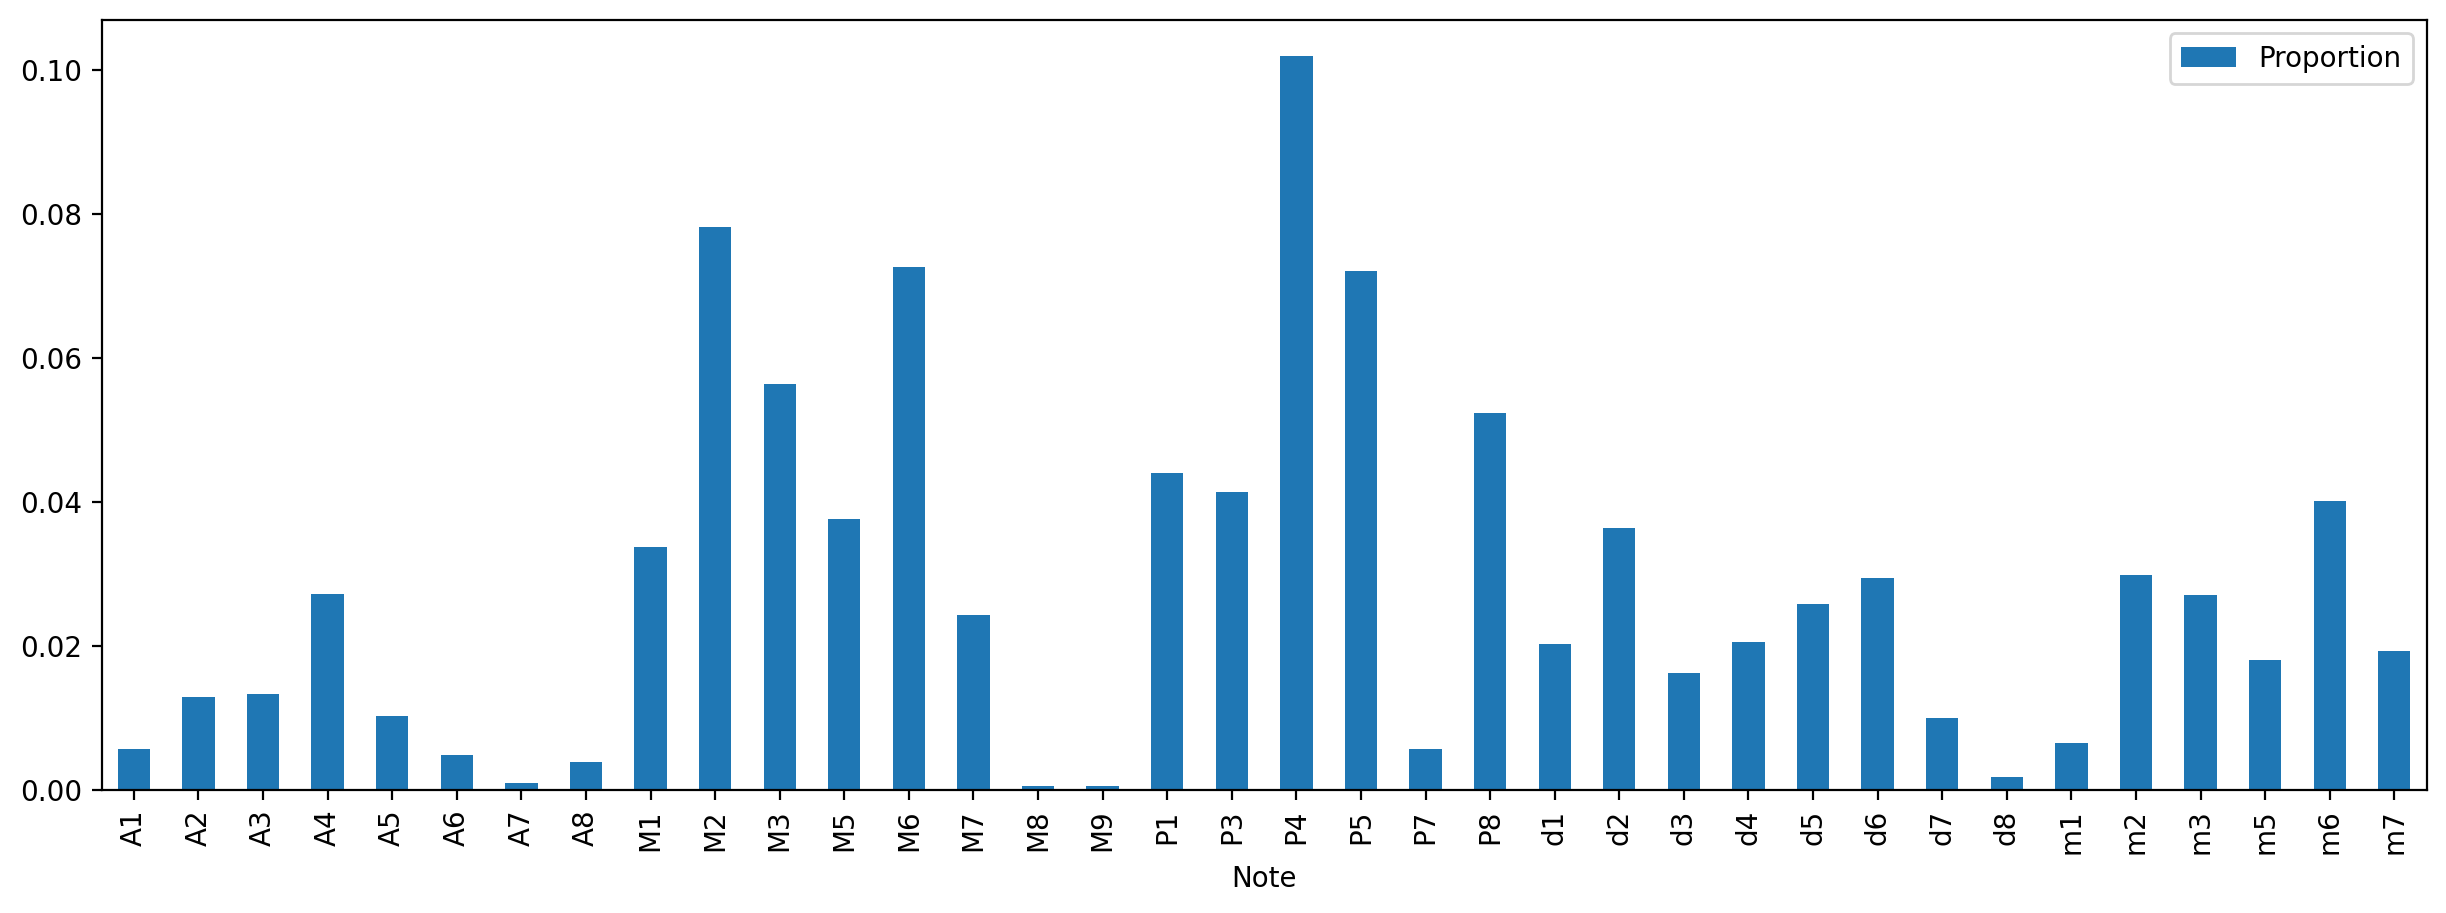

In [5]:
row_sums = df_wide.iloc[:, :].sum(axis=1)
total_sum = row_sums.sum()
row_sums_proportions = row_sums / total_sum
df_graph = pd.DataFrame(row_sums_proportions, columns=['Proportion'])
df_graph.plot(kind='bar', y = 'Proportion',figsize=(15, 5))

df_graph.to_csv('chopin.csv')

'''random_numbers = np.random.rand(len(df_graph))
total_sum = random_numbers.sum()
df_graph['Random'] = random_numbers/total_sum
print(df_graph.head())
#df_graph.set_index('Note', inplace=True)
df_graph.plot(kind='bar', y = ['Proportion', 'Random'], alpha = 0.7, width = 0.8, figsize=(15, 5))'''

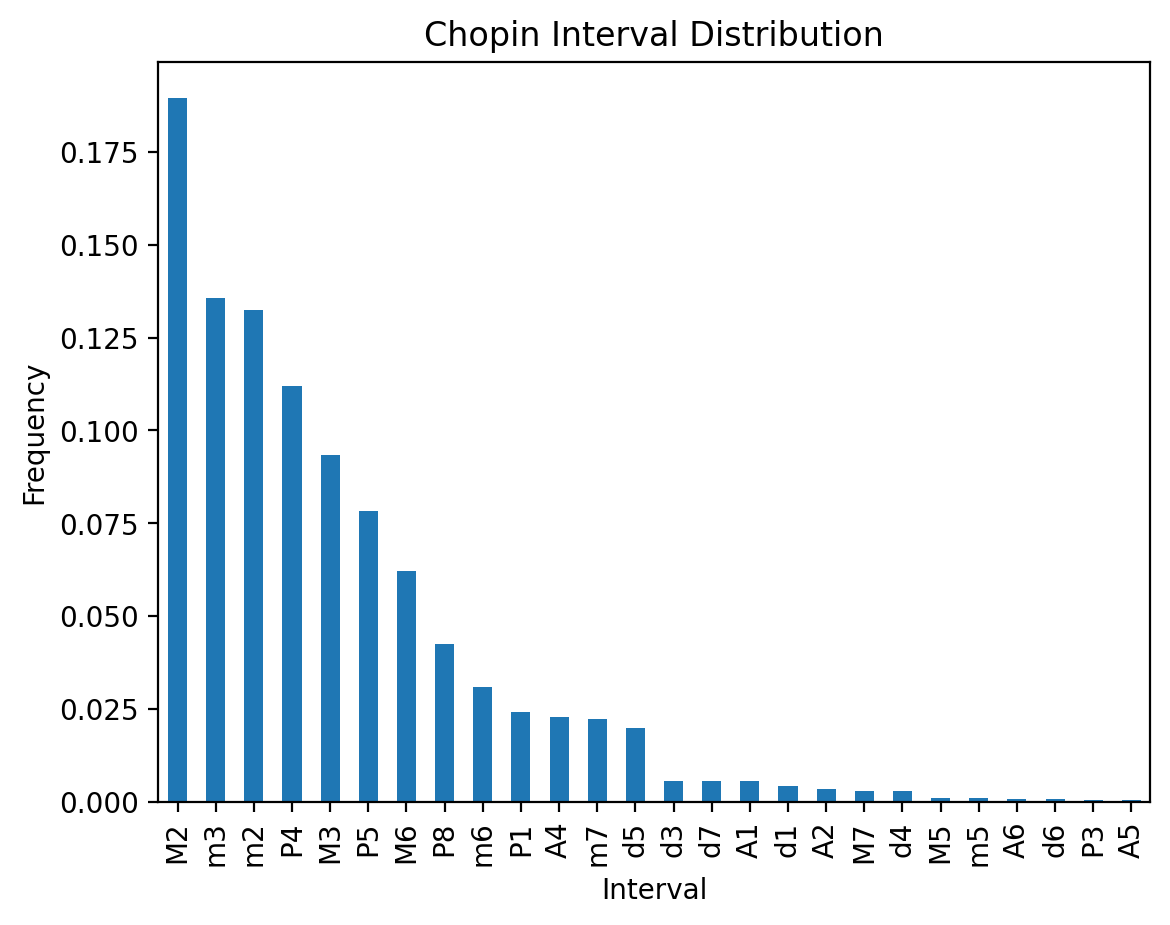

In [6]:
df['Interval'].value_counts(normalize = True).plot(kind='bar')

plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.title('Chopin Interval Distribution')
plt.show()


In [7]:
df_wide.iloc[:, :] = df_wide.iloc[:, :].div(row_sums, axis=0)
df_wide.head(10)

/var/folders/kl/q25q7kpx0l9bqvgdy52t3jpm0000gn/T/ipykernel_17827/4037775919.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Note
A1    0.000000
A2    0.068493
A3    0.092105
A4    0.019355
A5    0.034483
A6    0.037037
A7    0.000000
A8    0.045455
M1    0.000000
M2    0.000000
M3    0.015576
M5    0.000000
M6    0.007246
M7    0.014493
M8    0.000000
M9    0.000000
P1    0.000000
P3    0.000000
P4    0.000000
P5    0.002433
P7    0.000000
P8    0.000000
d1    0.000000
d2    0.000000
d3    0.010870
d4    0.000000
d5    0.000000
d6    0.000000
d7    0.000000
d8    0.000000
m1    0.000000
m2    0.000000
m3    0.000000
m5    0.000000
m6    0.000000
m7    0.000000
Name: A1, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_wide.iloc[:, :] = df_wide.iloc[:, :].div(row_sums, axis=0)
/var/folders/kl/q25q7kpx0l9bqvgdy52t3jpm0000gn/T/ipykernel_17827/4037775919.py

Interval,A1,A2,A4,A5,A6,M2,M3,M5,M6,M7,...,d3,d4,d5,d6,d7,m2,m3,m5,m6,m7
Note,,,,,,,,,,,,,,,,,,,,,
A1,0.000000,0.000000,0.125000,0.000000,0.03125,0.093750,0.093750,0.000000,0.093750,0.000000,...,0.000000,0.000000,0.062500,0.000000,0.031250,0.062500,0.093750,0.000000,0.062500,0.000000
A2,0.068493,0.068493,0.095890,0.000000,0.00000,0.191781,0.068493,0.000000,0.027397,0.000000,...,0.000000,0.000000,0.013699,0.000000,0.013699,0.150685,0.150685,0.000000,0.095890,0.000000
A3,0.092105,0.000000,0.026316,0.000000,0.00000,0.144737,0.131579,0.000000,0.065789,0.000000,...,0.000000,0.000000,0.039474,0.013158,0.000000,0.263158,0.052632,0.000000,0.039474,0.000000
A4,0.019355,0.006452,0.045161,0.000000,0.00000,0.090323,0.051613,0.000000,0.025806,0.000000,...,0.180645,0.012903,0.083871,0.012903,0.012903,0.232258,0.122581,0.000000,0.019355,0.000000
A5,0.034483,0.000000,0.017241,0.017241,0.00000,0.086207,0.258621,0.000000,0.068966,0.000000,...,0.000000,0.017241,0.017241,0.017241,0.000000,0.137931,0.103448,0.000000,0.034483,0.017241
A6,0.037037,0.074074,0.000000,0.000000,0.00000,0.111111,0.074074,0.000000,0.000000,0.000000,...,0.037037,0.000000,0.148148,0.000000,0.000000,0.185185,0.074074,0.000000,0.037037,0.000000
A7,0.000000,0.000000,0.000000,0.000000,0.00000,0.200000,0.600000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A8,0.045455,0.000000,0.363636,0.000000,0.00000,0.045455,0.136364,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045455,0.136364,0.000000,0.000000,0.045455,0.000000
M1,0.000000,0.000000,0.046875,0.005208,0.00000,0.286458,0.036458,0.000000,0.109375,0.010417,...,0.000000,0.000000,0.046875,0.000000,0.000000,0.119792,0.130208,0.000000,0.026042,0.015625


In [8]:
row_names = df_wide.index.tolist()
note_chain = mu.conversions('C', df_wide, 25, row_names)
note_chain

['C',
 'D-',
 'G-',
 'B-',
 'E-',
 'G-',
 'C-',
 'D-',
 'F',
 'B-',
 'D',
 'E',
 'E',
 'C#',
 'A#',
 'C#',
 'E#',
 'F##',
 'D##',
 'F###',
 'C###',
 'E###',
 'F####',
 'C####',
 'F####',
 'G###']

In [9]:
all_rhythm = []
all_prev_rhythm = []

mu.get_rhythms(all_rhythm, all_prev_rhythm, folder_path)


In [10]:
df_rhythm = pd.DataFrame({'Rhythm': all_prev_rhythm, 'Next Rhythm': all_rhythm})

df_wide_rhythm = df_rhythm.pivot_table(index='Rhythm', columns='Next Rhythm', aggfunc='size', fill_value=0)
print(df_wide_rhythm.shape)
df_wide_rhythm.head(30)

(17, 15)


Next Rhythm,0,1/12,0.125,1/6,1/5,0.25,3/10,1/3,0.375,0.5,0.75,1.0,1.5,2.0,3.0
Rhythm,,,,,,,,,,,,,,,
0.0,14,0,0,0,0,0,0,2,0,1,0,0,2,0,0
1/12,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
0.125,0,0,1,0,0,2,0,0,4,0,0,0,1,0,0
1/6,2,1,0,2038,0,0,0,0,0,4,0,1,0,0,0
1/5,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0
0.25,6,0,0,0,1,2811,0,1,0,12,1,11,1,0,0
3/10,0,0,0,0,0,0,8,0,0,1,0,0,1,0,0
1/3,2,0,0,0,0,0,0,951,0,0,0,2,0,0,0
0.375,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0


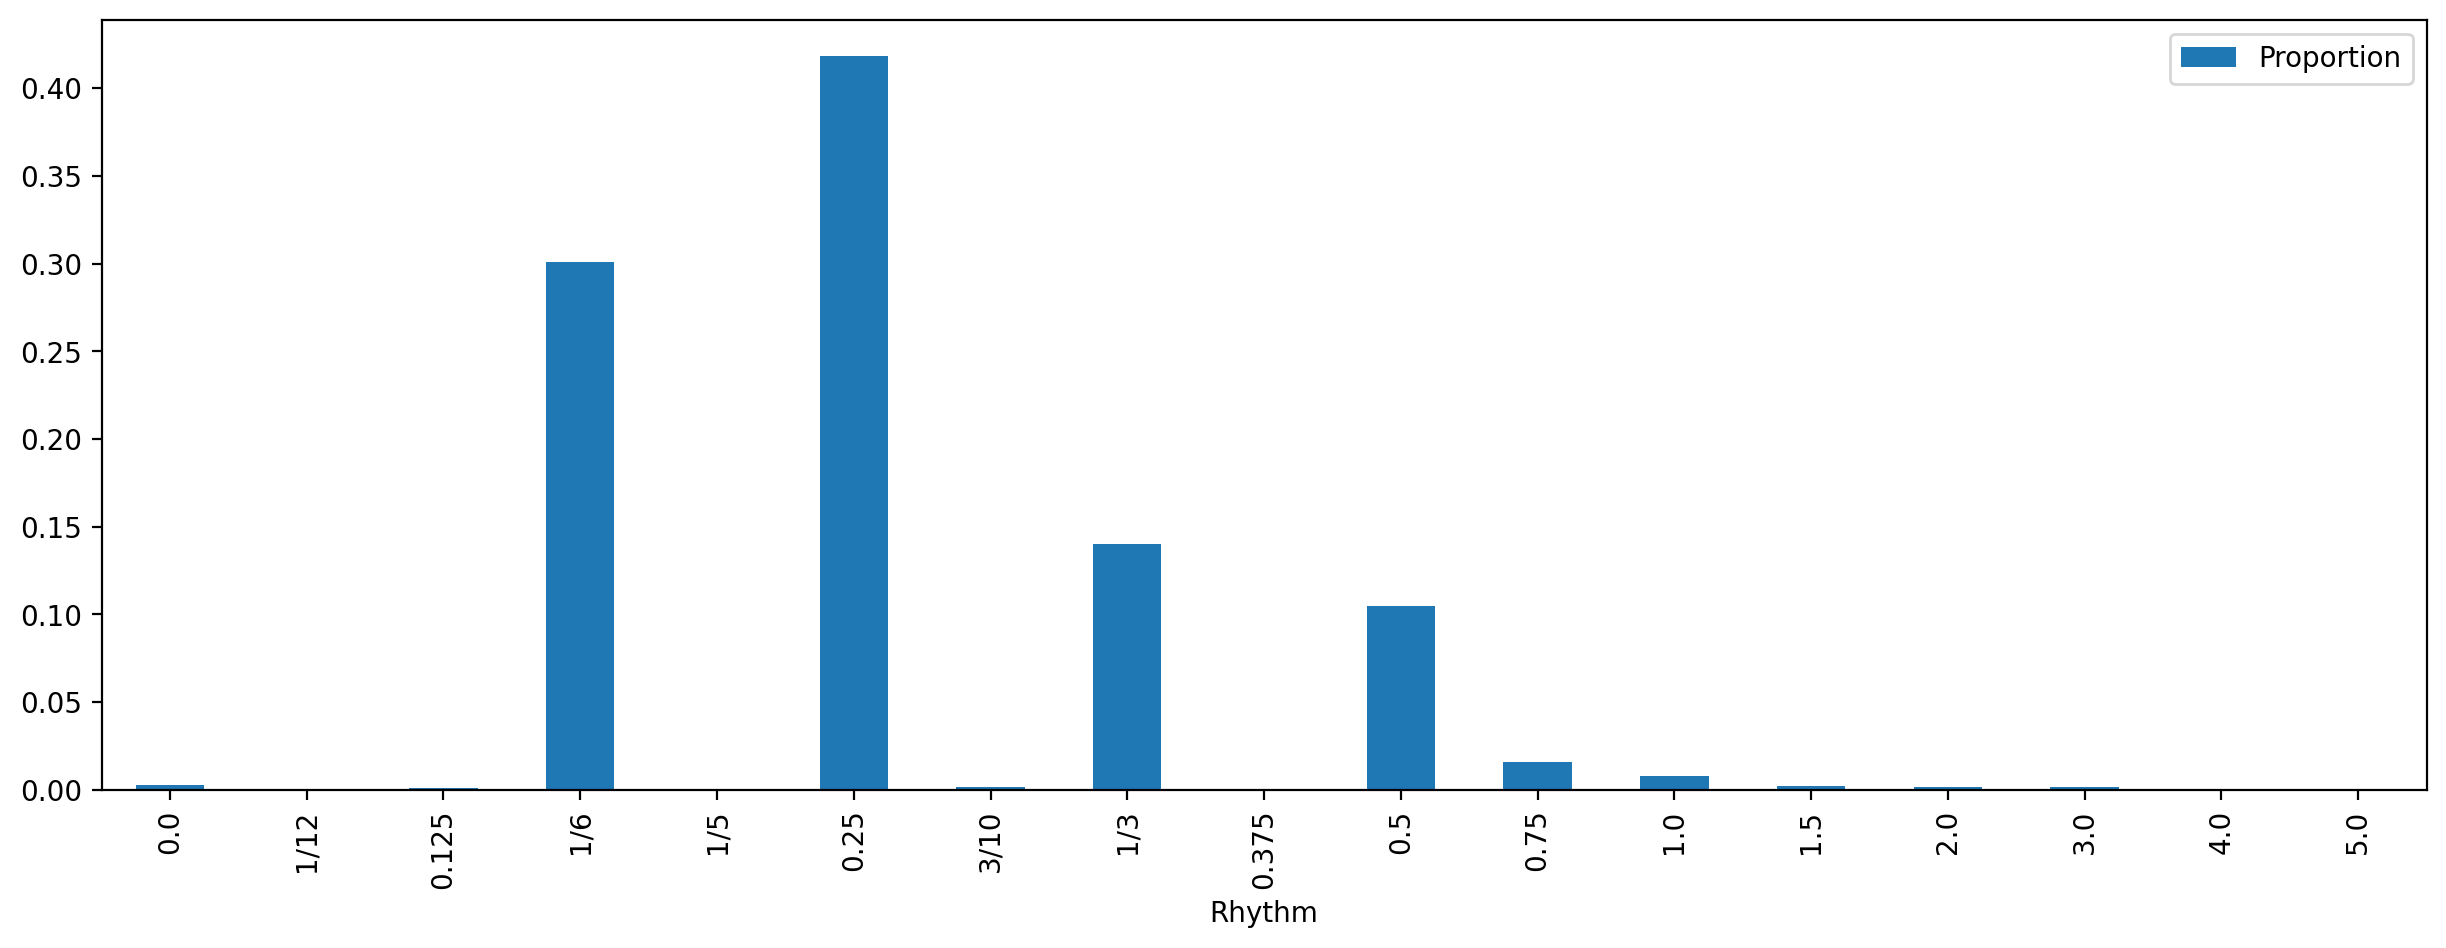

In [11]:
row_sums = df_wide_rhythm.iloc[:, :].sum(axis=1)
total_sum = row_sums.sum()
row_sums_proportions = row_sums / total_sum
df_plot_rhythm = pd.DataFrame(row_sums_proportions, columns=['Proportion'])
df_plot_rhythm.plot(kind='bar', y = 'Proportion',figsize=(15, 5))

df_plot_rhythm.to_csv('chopin_rhythm.csv')


In [12]:
df_wide_rhythm.iloc[:, :] = df_wide_rhythm.iloc[:, :].div(row_sums, axis=0)
row_names_rhythm = df_wide_rhythm.index.tolist()
df_wide_rhythm.head(15)

/var/folders/kl/q25q7kpx0l9bqvgdy52t3jpm0000gn/T/ipykernel_17827/3629646307.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Rhythm
0.0      0.736842
1/12     0.000000
0.125    0.000000
1/6      0.000978
1/5      0.000000
0.25     0.002110
3/10     0.000000
1/3      0.002094
0.375    0.000000
0.5      0.011220
0.75     0.009259
1.0      0.037037
1.5      0.142857
2.0      0.000000
3.0      0.000000
4.0      1.000000
5.0      0.000000
Name: 0, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_wide_rhythm.iloc[:, :] = df_wide_rhythm.iloc[:, :].div(row_sums, axis=0)
/var/folders/kl/q25q7kpx0l9bqvgdy52t3jpm0000gn/T/ipykernel_17827/3629646307.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Rhythm
0.0      0.000000
1/12     0.500000
0.125    0.000000
1/6      0.000489
1/5      0.000000


Next Rhythm,0,1/12,0.125,1/6,1/5,0.25,3/10,1/3,0.375,0.5,0.75,1.0,1.5,2.0,3.0
Rhythm,,,,,,,,,,,,,,,
0.0,0.736842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.0,0.052632,0.000000,0.000000,0.105263,0.000000,0.000000
1/12,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.125,0.000000,0.000000,0.125000,0.000000,0.000000,0.250000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000
1/6,0.000978,0.000489,0.000000,0.996090,0.000000,0.000000,0.000000,0.000000,0.0,0.001955,0.000000,0.000489,0.000000,0.000000,0.000000
1/5,0.000000,0.000000,0.200000,0.000000,0.800000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.25,0.002110,0.000000,0.000000,0.000000,0.000352,0.988397,0.000000,0.000352,0.0,0.004219,0.000352,0.003868,0.000352,0.000000,0.000000
3/10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,0.000000,0.0,0.100000,0.000000,0.000000,0.100000,0.000000,0.000000
1/3,0.002094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.995812,0.0,0.000000,0.000000,0.002094,0.000000,0.000000,0.000000
0.375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


In [13]:
rhythm_chain = mu.simulate_MC2(1.0, df_wide_rhythm, row_names_rhythm, 30)
rhythm_chain

[0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25]

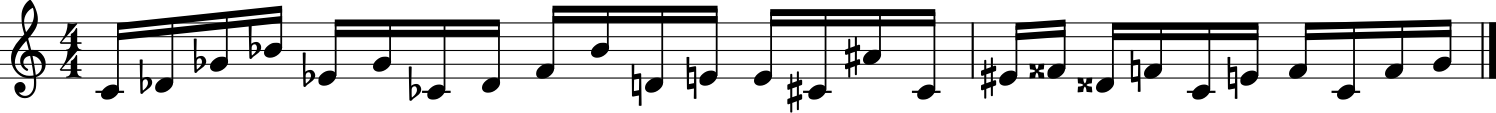

In [14]:
stream1 = stream.Stream()
count = note_chain.__len__()

for i in range(count):
    if stream1.measureNumber == 4:
        break
    n = note.Note(note_chain[i])
    n.duration.quarterLength = rhythm_chain[i]
    stream1.append(n)

stream1.show()

#stream1.write('midi', fp='first_test_stream.xml')

stream1.show('midi')